Train set: (800, 11) (800,)
Test set: (200, 11) (200,)
Train set Accuracy:  0.5475
Test set Accuracy:  0.32


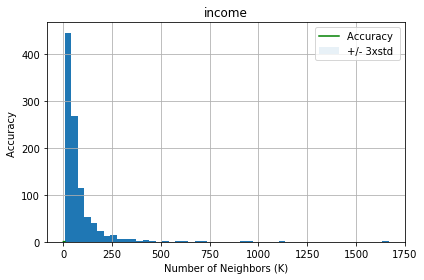

The best accuracy was with 0.34 with k= 9


In [2]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter as nf
import matplotlib.ticker as tck
import pandas as pd
from sklearn import preprocessing as pr
%matplotlib inline

#to read the csv file
df = pd.read_csv('teleCust1000t.csv')
df.head()

#to check the counts of classes
df['custcat'].value_counts()

#exploring data
df.hist(column='income', bins=50)

#defining feature sets
df.columns

#creating an array using attr
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
X[0:5]

#our labels
y = df['custcat'].values
y[0:5]

#normalizing the data
X = pr.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

#importing neighbors classifier
from sklearn.neighbors import KNeighborsClassifier as knc

#starting the algortihm with k=4 for now
k = 4
#Train Model and Predict 
neigh = knc(n_neighbors = k).fit(X_train,y_train)
neigh

#using model to predict test set
yhat = neigh.predict(X_test)
yhat[0:5]

#finding acciracy for train and test set
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = knc(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat == y_test)/np.sqrt(yhat.shape[0])

mean_acc

#plotting graph
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 